In [21]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0 
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
layer_num = 12
head_num = 12
lw=3

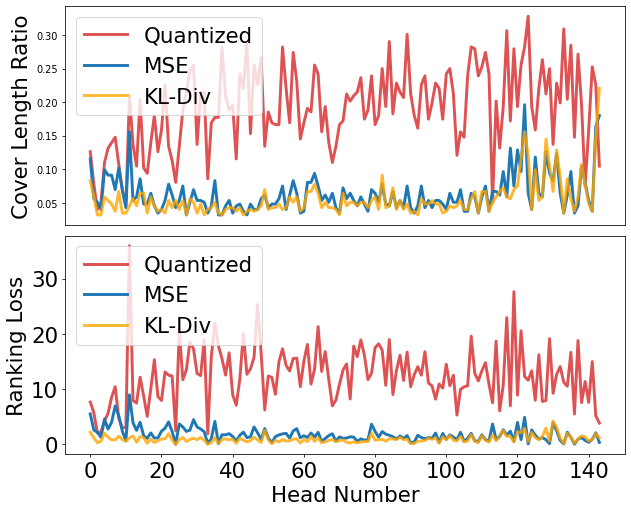

In [24]:


ranking_dict = torch.load("sst-2-base-ranking-dict.pt")
cover_list_1 = torch.load("sst-2-base-kl.pt")
cover_list_2 = torch.load("sst-2-base-mse.pt")
q_cover_list = torch.load("sst-2-base-q.pt")

fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(10, 8), dpi=70)
fs=22
ax1.plot(list(range(layer_num*head_num)), q_cover_list, label="Quantized", color="tab:red", linewidth=lw, alpha=0.8)
ax1.plot(list(range(layer_num*head_num)), cover_list_2, label="MSE", color="tab:blue", linewidth=lw, alpha=1)
ax1.plot(list(range(layer_num*head_num)), cover_list_1, label="KL-Div", color="orange", linewidth=lw, alpha=0.8)


# ax.plot(list(range(layer_num*head_num)), tc_cover_list, color="gray", label="True Ratio", linewidth=lw)
ax1.legend(fontsize=fs, loc=2)
# ax1.set_xlabel("Head Number", fontsize=fs)
ax1.set_ylabel("Cover Length Ratio", fontsize=fs)
# plt.yscale("log")
ax1.get_xaxis().set_visible(False)
ax2.plot(list(range(layer_num*head_num)), ranking_dict["Q"], label="Quantized", color="tab:red", linewidth=lw, alpha=0.8)
ax2.plot(list(range(layer_num*head_num)), ranking_dict["1SB_S"], label="MSE", color="tab:blue", linewidth=lw, alpha=1)
ax2.plot(list(range(layer_num*head_num)), ranking_dict["1SB_M"], label="KL-Div", color="orange", linewidth=lw, alpha=0.8)


# ax.plot(list(range(layer_num*head_num)), tc_cover_list, color="gray", label="True Ratio", linewidth=lw)
ax2.legend(fontsize=fs, loc=2)
ax2.set_xlabel("Head Number", fontsize=fs)
ax2.set_ylabel("Ranking Loss", fontsize=fs)
ax2.tick_params(labelsize=fs)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.05)